In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/titanic-passengers_1.csv",sep=';')
# print(df.head())
print(df.isnull().sum())
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# print(df['Cabin'].value_counts())
# print(df['Embarked'].value_counts())

df['Cabin'].fillna("G6", inplace=True)
df['Embarked'].fillna("S", inplace=True)
print(df.isnull().sum())
print(df.head())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Emb

In [40]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

# plot_correlation_map( df )
c = df.groupby(['Survived'])['Pclass'].mean()
# print(c)

# max_nan_value_count = 5
# data_extracted = df.drop(df.columns[df.apply(lambda 
# col: col.isnull().sum() > max_nan_value_count)], axis=1)
# print(data_extracted.head())

# df.drop(['Name'], axis=1)

Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",
                    "Rev":         "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess":      "Royalty",

                    "Dona":      "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :        "Mrs",

                    "Master" :    "Master"

                    }
Title_Dictionary_num = {

                    "Officer": 1,

                    "Royalty":  2,

                    "Miss": 3,

                    "Mrs": 4,

                    "Master" : 5

                    }
print("******************")
title_list = []
for key in Title_Dictionary:
  for name in df['Name']:
    if key+"." in name:
      title_list.append(Title_Dictionary[key])
df['Title'] = title_list
print(df['Title'])
print("******************")
print(df.head())
df = df.drop(['Name'], axis=1)
print(df.head())
# df['Sex'].replace(['male', 'female'],
#                         [0, 1], inplace=True)
# for key in Title_Dictionary_num:
#   df['Title'].replace([key],
#                         Title_Dictionary_num[key], inplace=True)
print(df['Title'])

# corr1 = df['Title'].corr(df['Sex'])
# print("corr1", corr1)
# corr2 = df['Title'].corr(df['Fare'])
# print("corr2", corr2)

# corr3 = df['Title'].corr(df['Age'])
# print("corr3", corr3)


******************
0      Officer
1      Officer
2      Officer
3      Officer
4      Officer
        ...   
886     Master
887     Master
888     Master
889     Master
890     Master
Name: Title, Length: 891, dtype: object
******************
   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked    Title  
0    male  28.0      0      0      248740  13.0000     G6        S  Officer  
1    male  25.0      0      0      348123   7.6500  F G73        S  Officer  
2    male  20.0      0      0      350050 

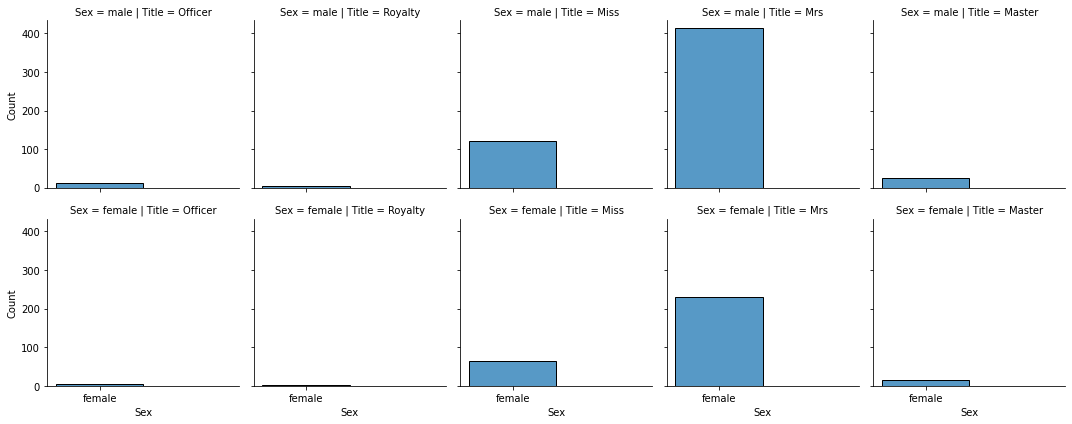

In [41]:
df
g = sns.FacetGrid(df, col="Title", row="Sex")
g.map_dataframe(sns.histplot, x="Sex", binwidth=2, binrange=(0, 1))

# f = sns.FacetGrid(df, col="Title", row="Fare")
# f.map_dataframe(sns.histplot, x="Fare", binwidth=2, binrange=(0, 1))

# a = sns.FacetGrid(df, col="Title", row="Age")
# a.map_dataframe(sns.histplot, x="Age", binwidth=2, binrange=(0, 1))
